In [1]:
# data
import pandas as pd
import numpy as np


# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Project Credit Risk/Data/credit_risk_dataset.csv")

In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# Feature Descriptions

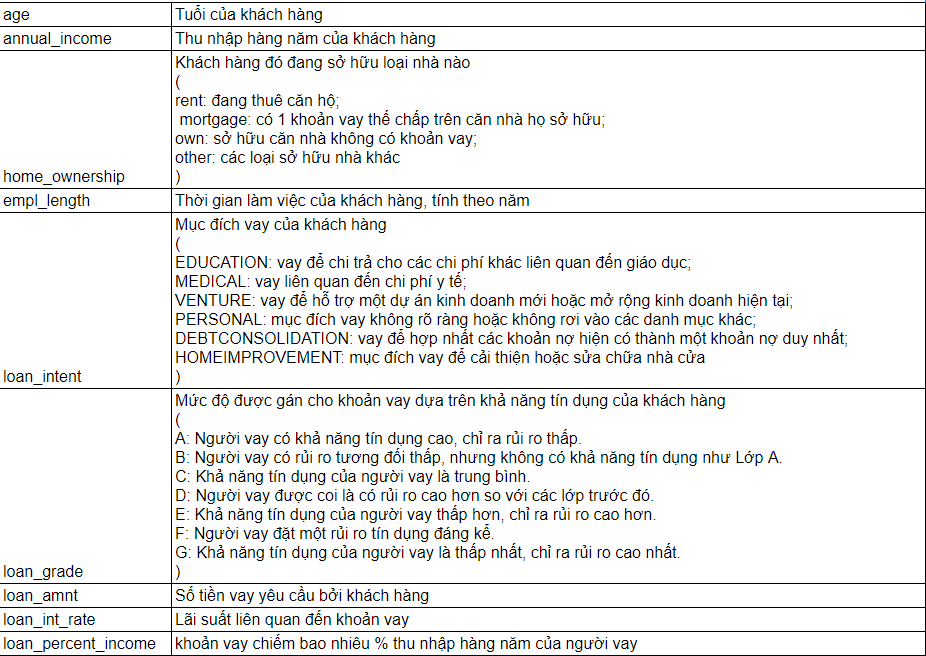

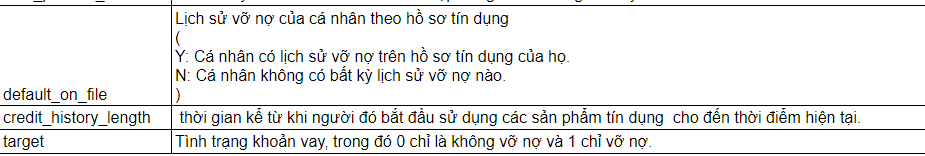

In [5]:
df = df.rename(columns={
    'person_age': 'age',
    'person_income': 'annual_income',
    'person_home_ownership': 'home_ownership',
    'person_emp_length': 'empl_length',
    'loan_status': 'target',
    'cb_person_default_on_file': 'default_on_file',
    'cb_person_cred_hist_length': 'credit_history_length'
})

In [6]:
df.head()

,age,annual_income,home_ownership,empl_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,target,loan_percent_income,default_on_file,credit_history_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    32581 non-null  int64  
 1   annual_income          32581 non-null  int64  
 2   home_ownership         32581 non-null  object 
 3   empl_length            31686 non-null  float64
 4   loan_intent            32581 non-null  object 
 5   loan_grade             32581 non-null  object 
 6   loan_amnt              32581 non-null  int64  
 7   loan_int_rate          29465 non-null  float64
 8   target                 32581 non-null  int64  
 9   loan_percent_income    32581 non-null  float64
 10  default_on_file        32581 non-null  object 
 11  credit_history_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


# EDA


<Axes: >

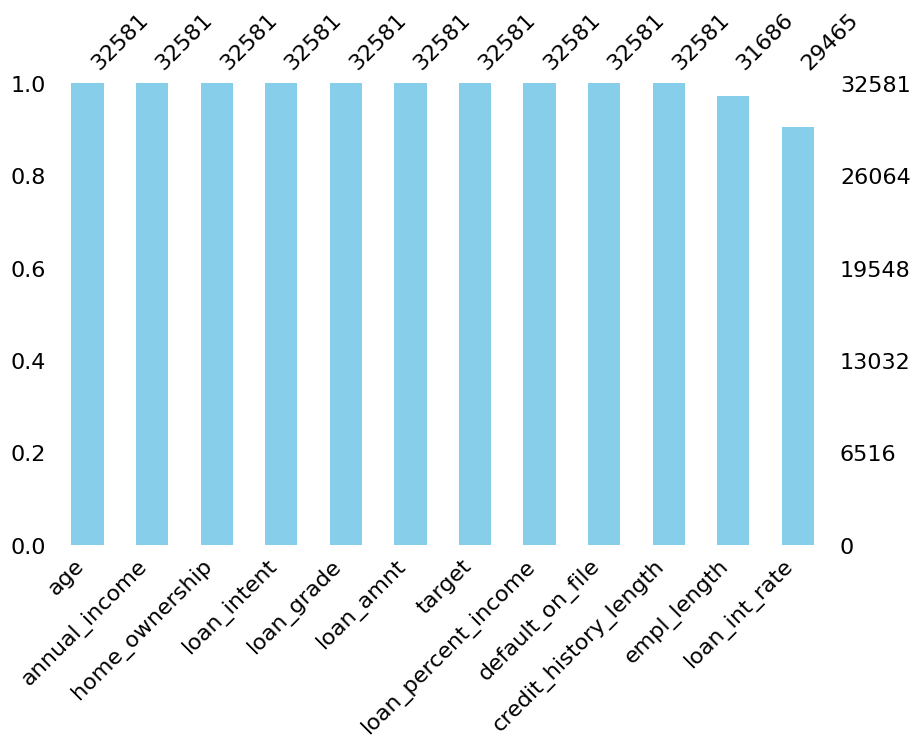

In [8]:
sorted_columns = df.isnull().sum().sort_values().index
msno.bar(df[sorted_columns], color='skyblue', figsize=(10, 6))


In [9]:
def plot_data_distribution(df, column_name):
    if df[column_name].dtype == 'object' or pd.api.types.is_categorical_dtype(df[column_name]):
        # It's categorical, use countplot
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(data=df, x=column_name, order=df[column_name].value_counts().index)
        plt.title(f'Distribution of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Count')
        plt.xticks(rotation=45)

        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 10),
                         textcoords = 'offset points')

        plt.show()
    else:
        # It's numerical, use histplot
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=column_name, kde=True, bins=30)
        plt.title(f'Distribution of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.show()

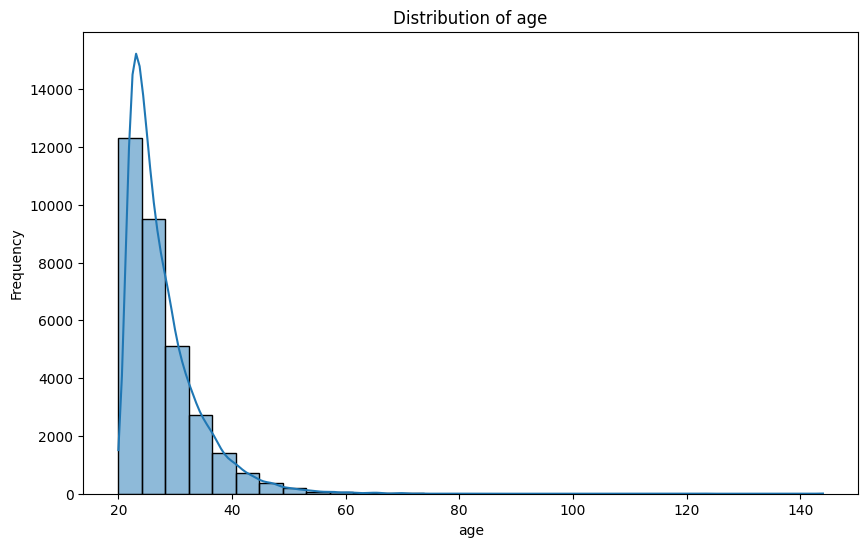

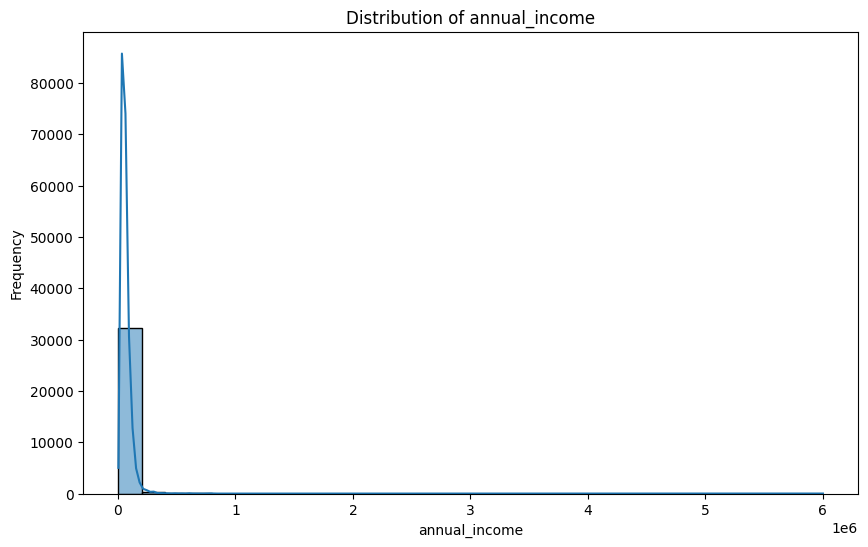

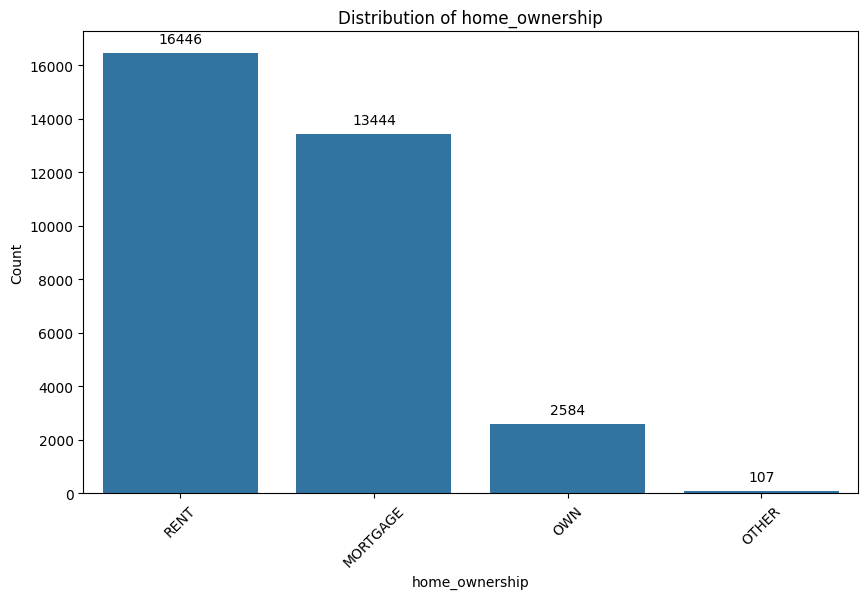

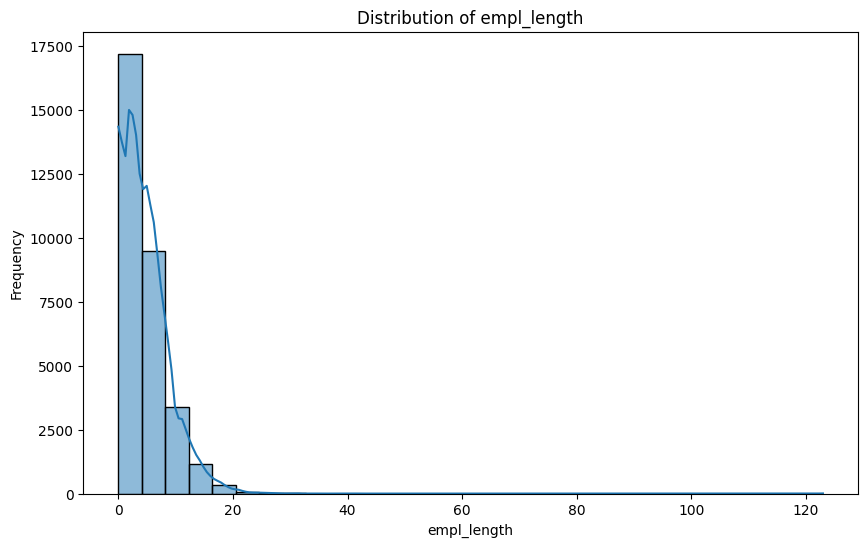

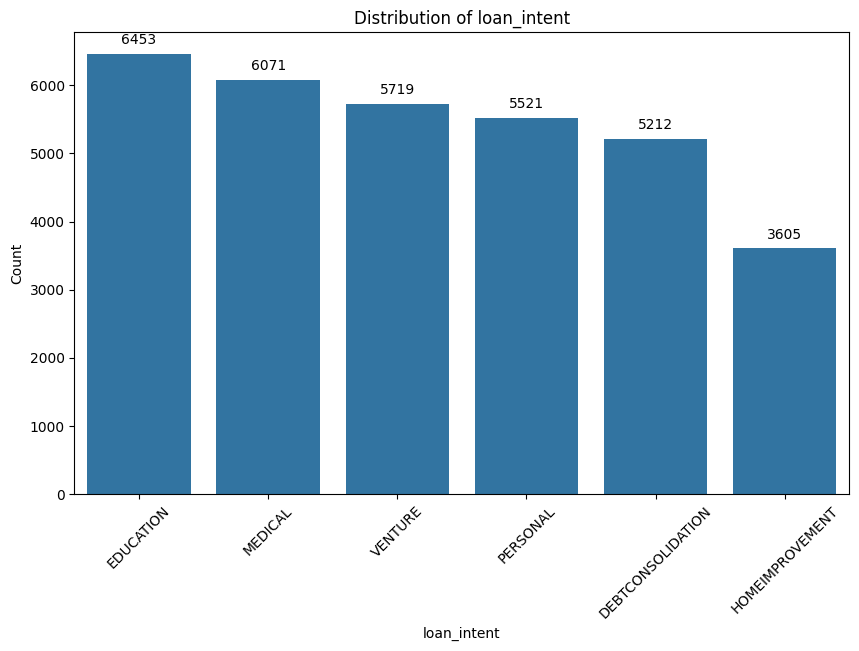

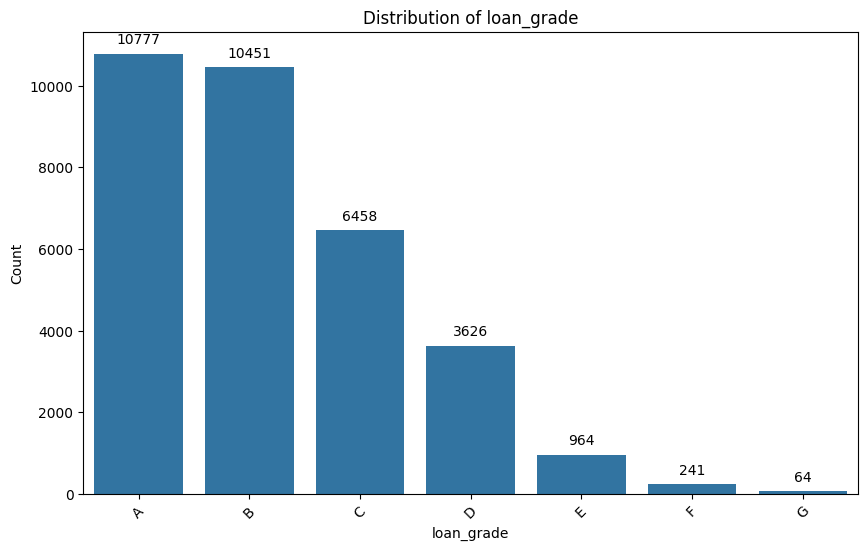

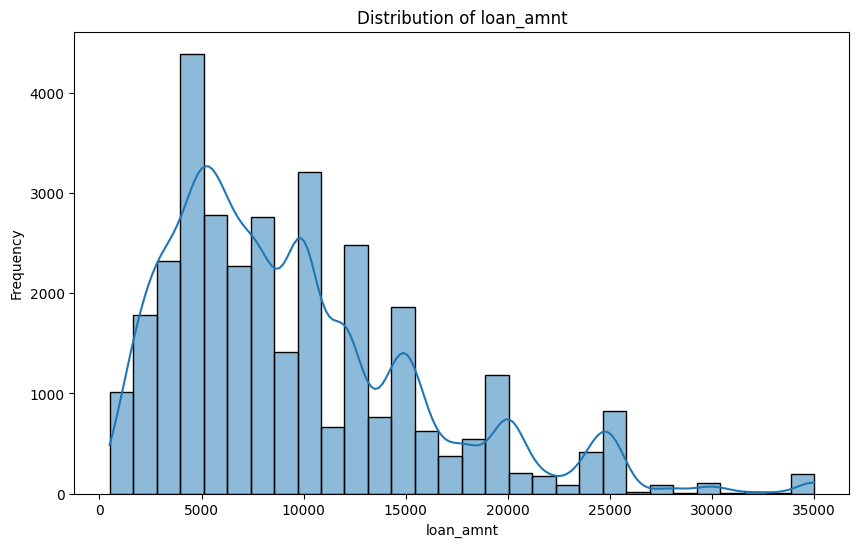

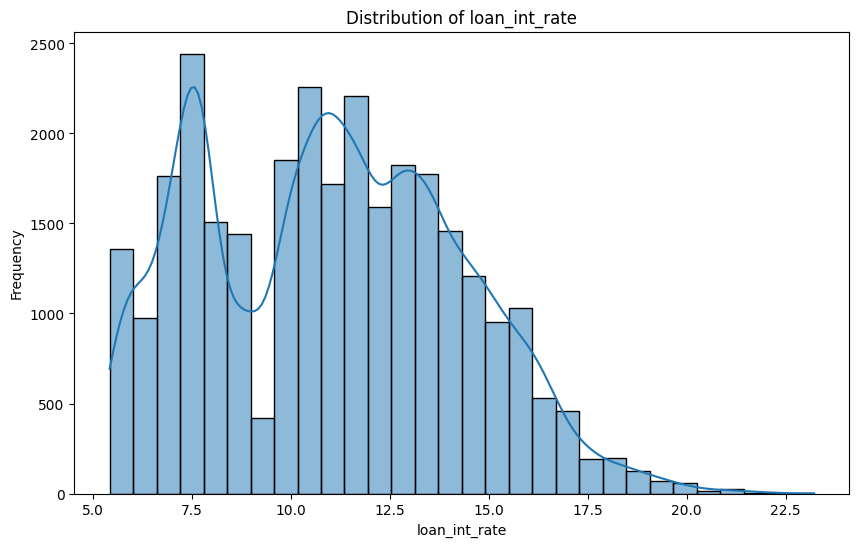

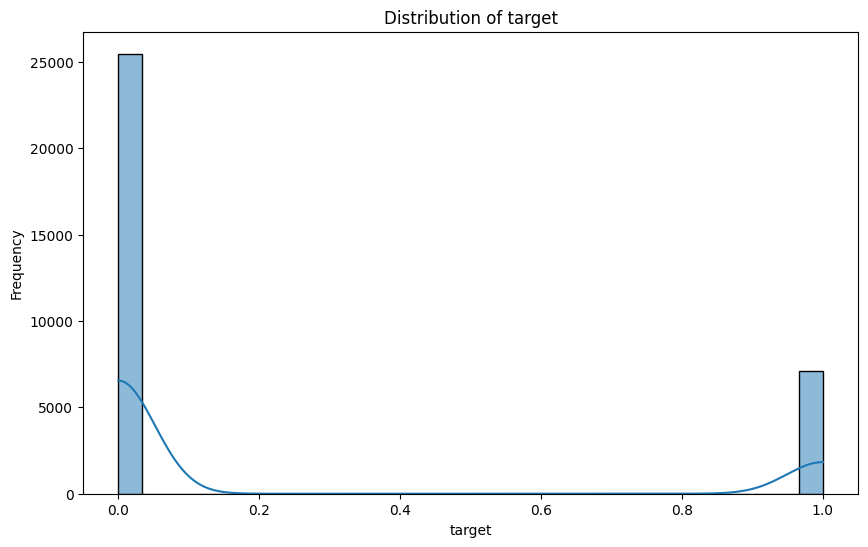

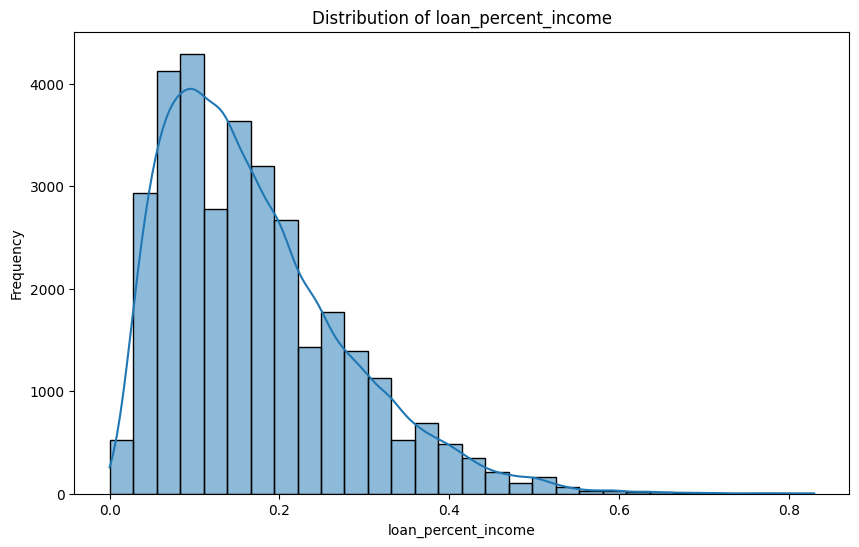

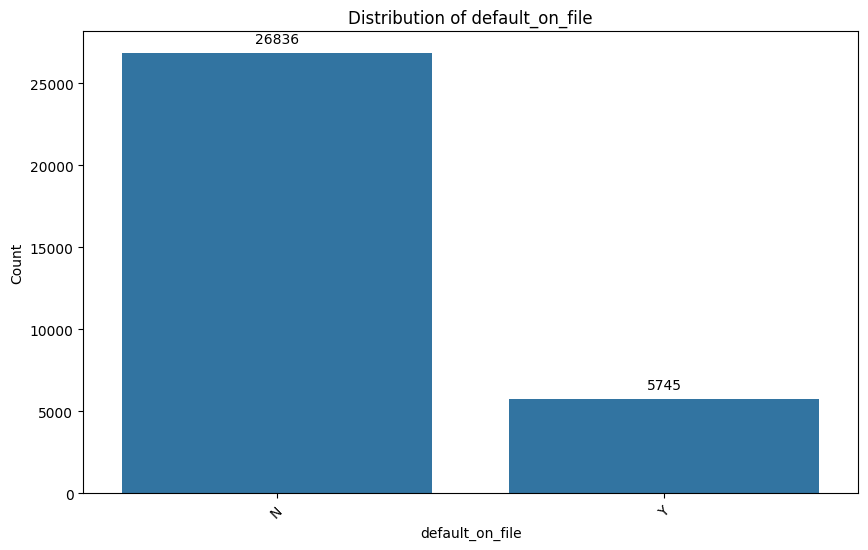

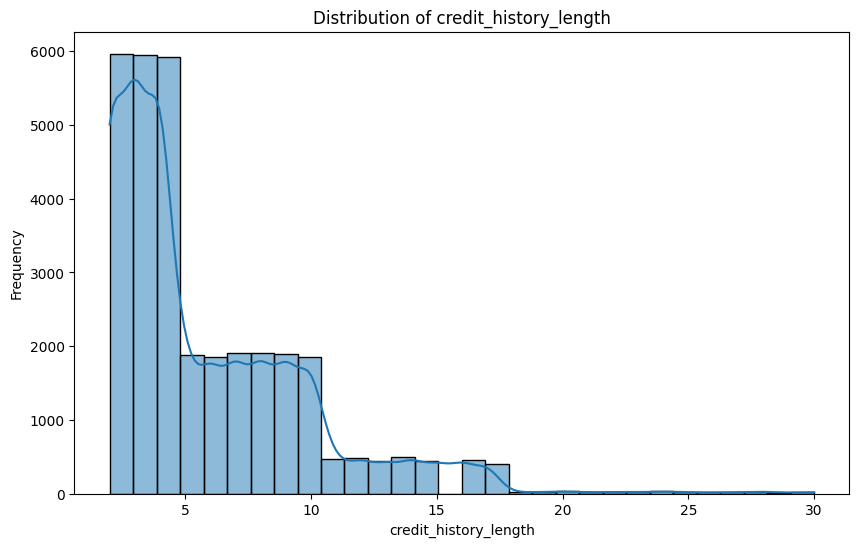

In [10]:
for column in df.columns:
  plot_data_distribution(df, column)

In [11]:
def plot_distribution_by_target(df, column_name):
    plt.figure(figsize=(11, 6))

    if df[column_name].dtype == 'object' or pd.api.types.is_categorical_dtype(df[column_name]):
        # It's categorical, use countplot
        ax = sns.countplot(data=df, x=column_name, hue='target', order=df[column_name].value_counts().index)
        plt.title(f'Distribution of {column_name} by target')
        plt.xlabel(column_name)
        plt.ylabel('Count')
        plt.xticks(rotation=45)

        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')
    else:
        # It's numerical, use histplot
        sns.histplot(data=df, x=column_name, hue='target', kde=True, bins=30, multiple='stack')
        plt.title(f'Distribution of {column_name} by target')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')

    plt.show()

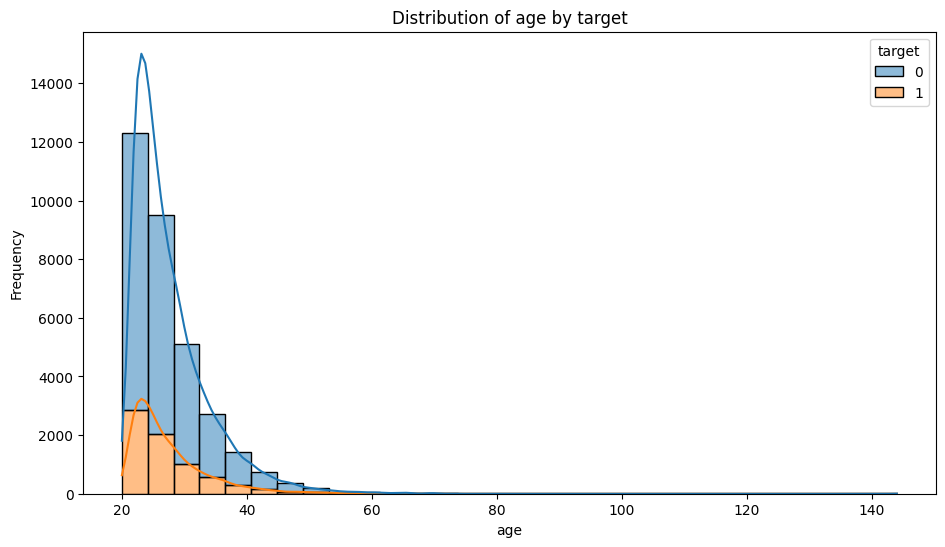

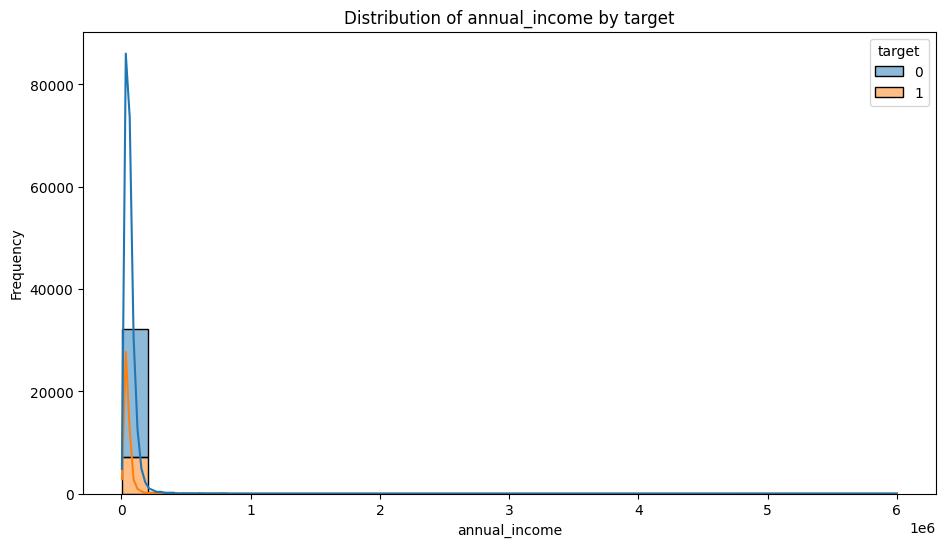

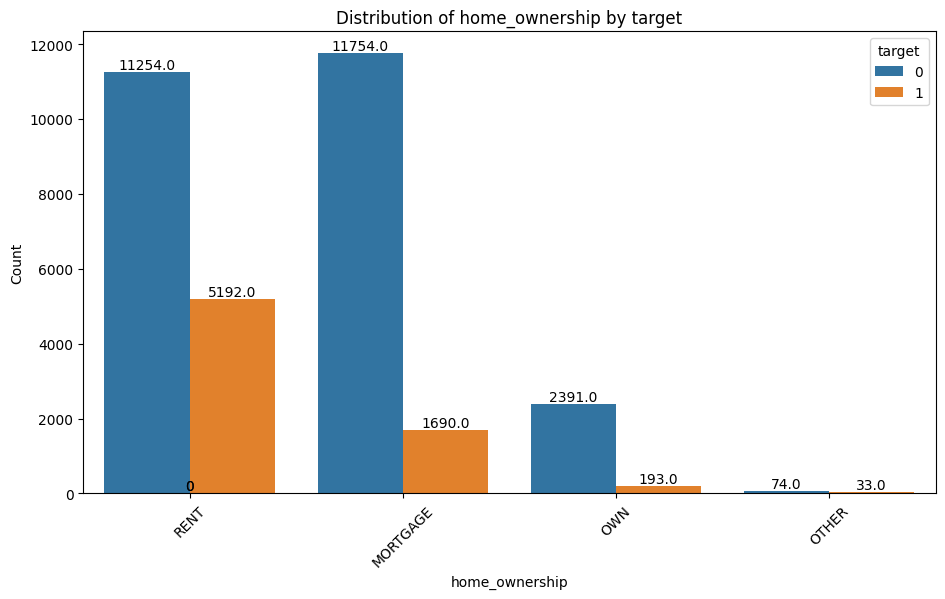

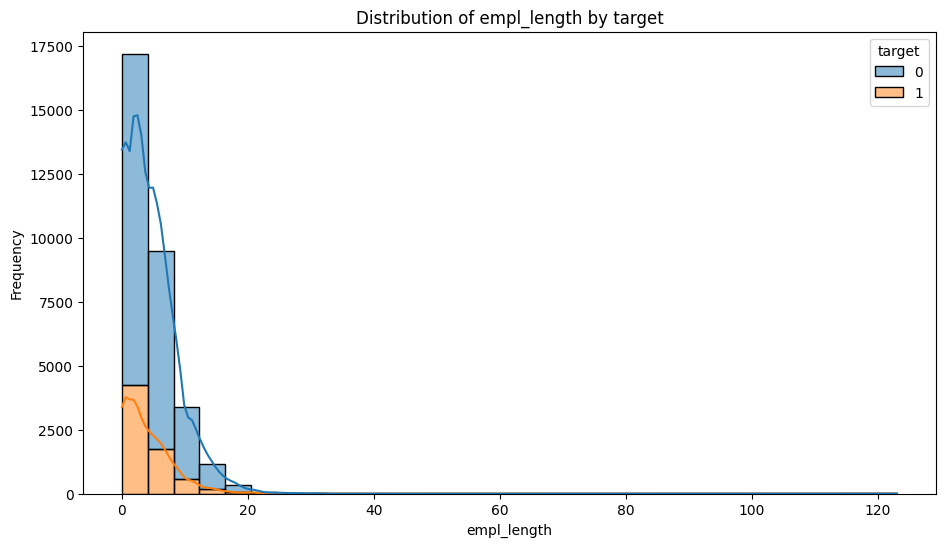

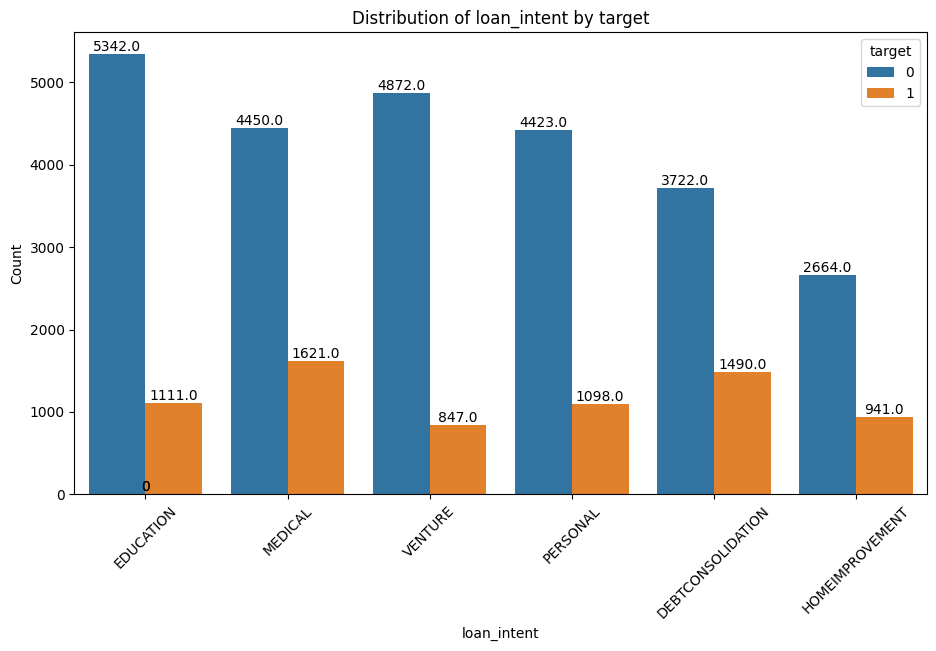

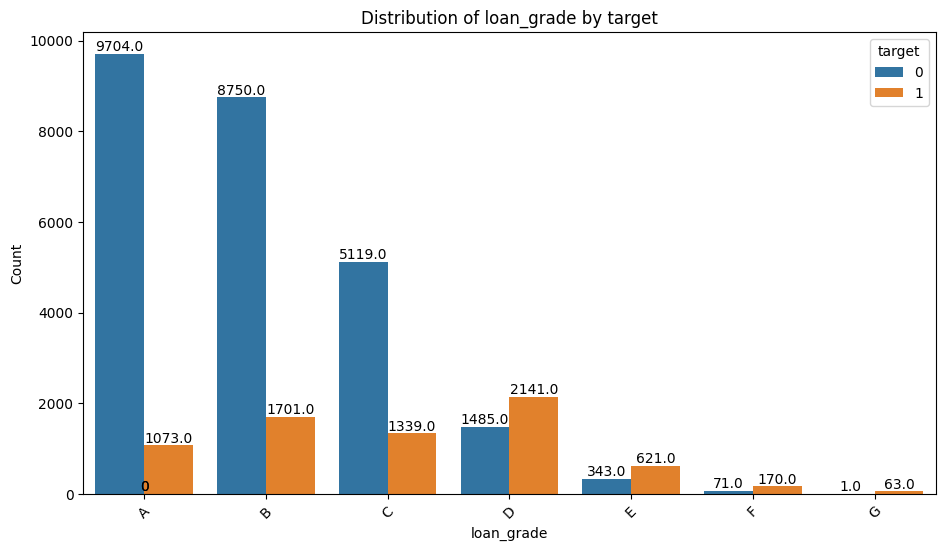

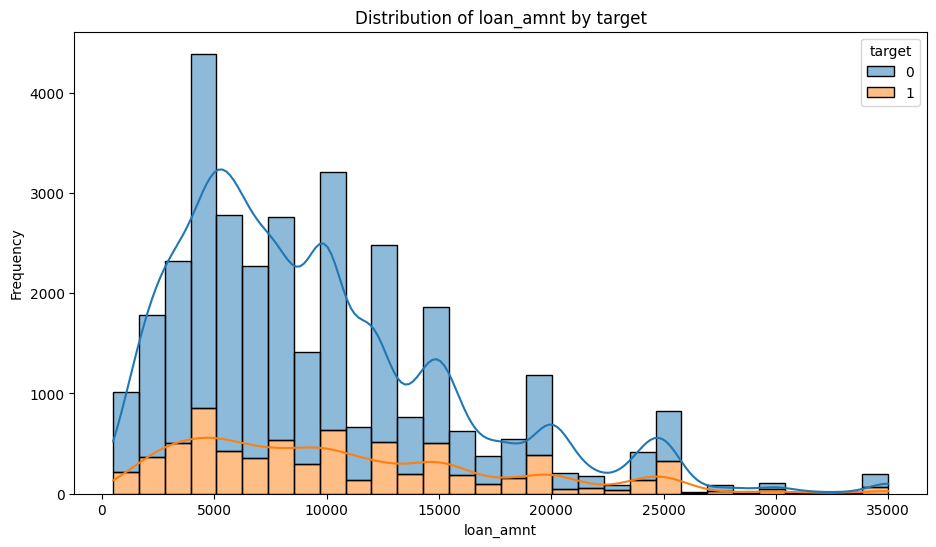

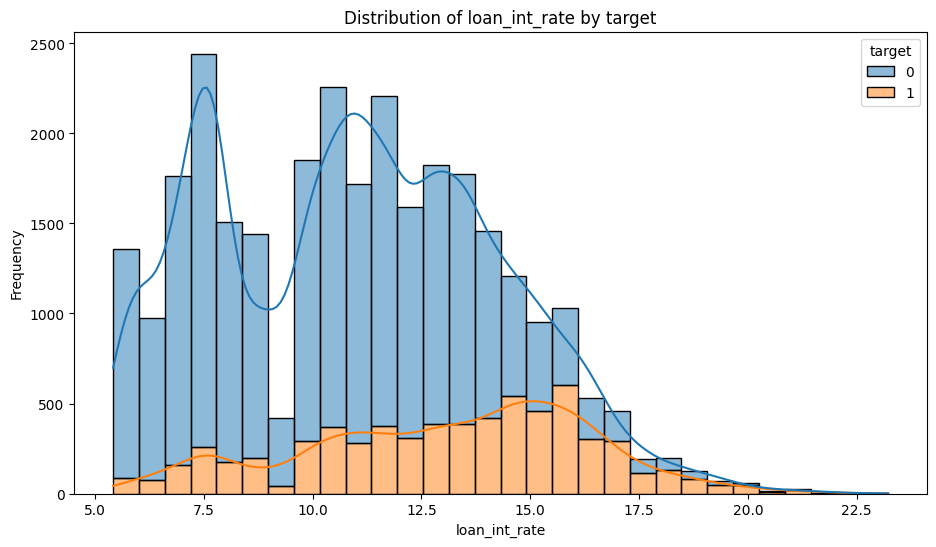

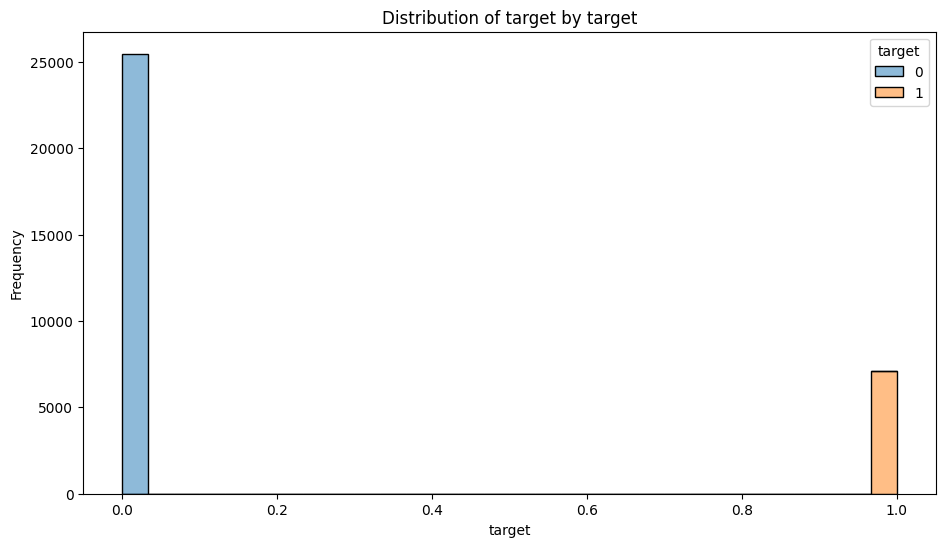

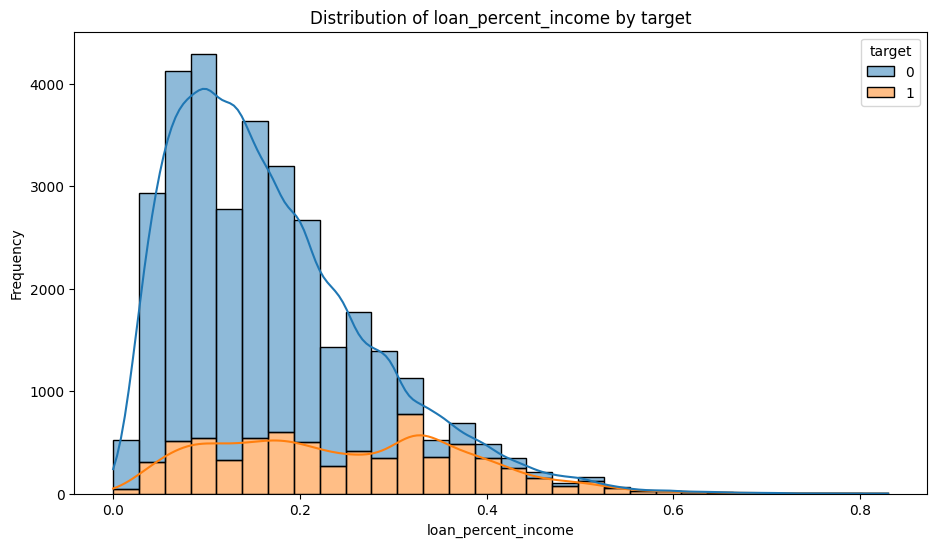

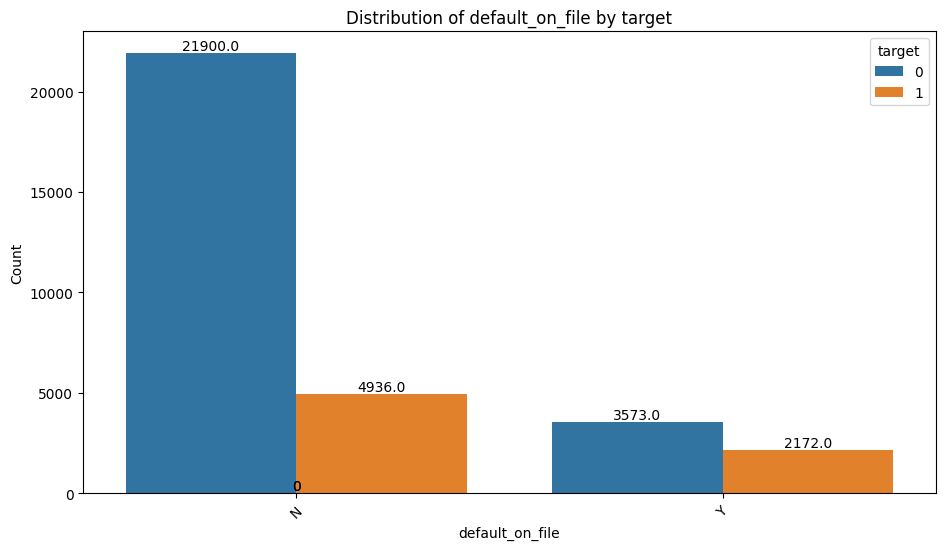

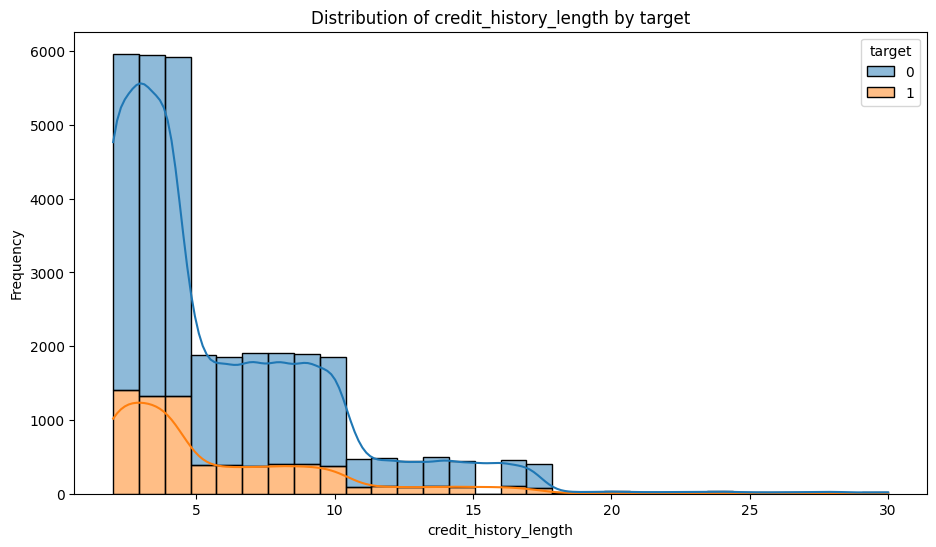

In [12]:
for column in df.columns:
  plot_distribution_by_target(df, column)

In [13]:
# def plot_boxplots(df):
#     numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
#     for column in numeric_columns:
#         plt.figure(figsize=(8, 6))
#         df.boxplot(column=column, vert=False)
#         plt.title(f'Boxplot of {column}')
#         plt.grid(True)
#         plt.show()


In [14]:
# plot_boxplots(df)

In [15]:
df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
age,32581.0,28.0,6.0,20.0,23.0,26.0,30.0,144.0
annual_income,32581.0,66075.0,61983.0,4000.0,38500.0,55000.0,79200.0,6000000.0
empl_length,31686.0,5.0,4.0,0.0,2.0,4.0,7.0,123.0
loan_amnt,32581.0,9589.0,6322.0,500.0,5000.0,8000.0,12200.0,35000.0
loan_int_rate,29465.0,11.0,3.0,5.0,8.0,11.0,13.0,23.0
target,32581.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
loan_percent_income,32581.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
credit_history_length,32581.0,6.0,4.0,2.0,3.0,4.0,8.0,30.0


age, annual_income, empl_length có giá trị max bất thường --> Drop / Standard Scale

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    32581 non-null  int64  
 1   annual_income          32581 non-null  int64  
 2   home_ownership         32581 non-null  object 
 3   empl_length            31686 non-null  float64
 4   loan_intent            32581 non-null  object 
 5   loan_grade             32581 non-null  object 
 6   loan_amnt              32581 non-null  int64  
 7   loan_int_rate          29465 non-null  float64
 8   target                 32581 non-null  int64  
 9   loan_percent_income    32581 non-null  float64
 10  default_on_file        32581 non-null  object 
 11  credit_history_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


# Categorical columns

In [17]:
cat_cols = df.select_dtypes("object").columns

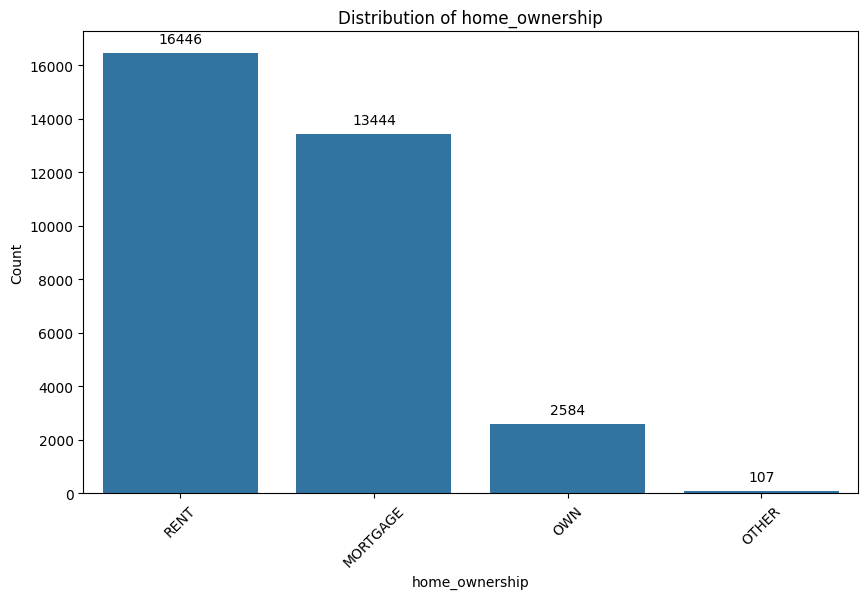

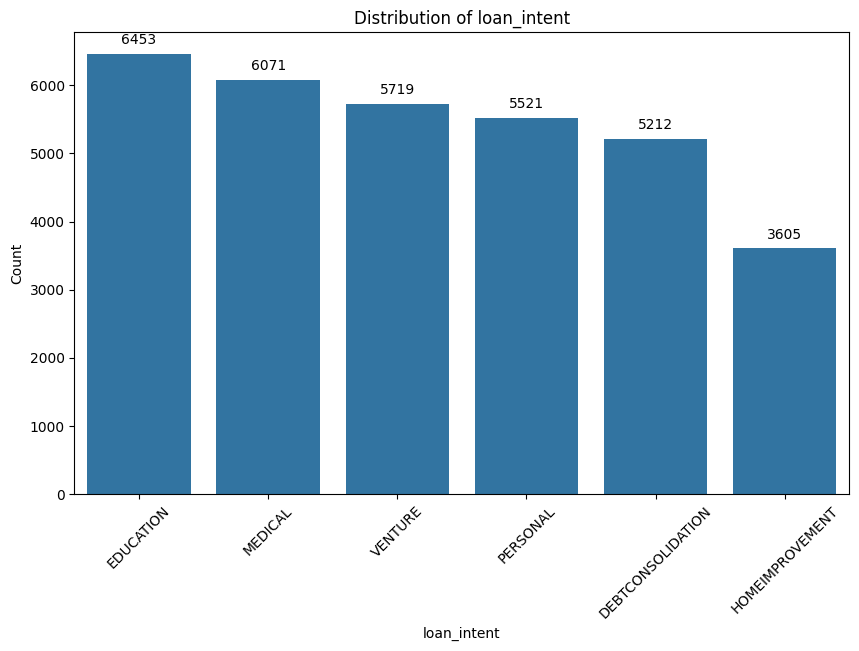

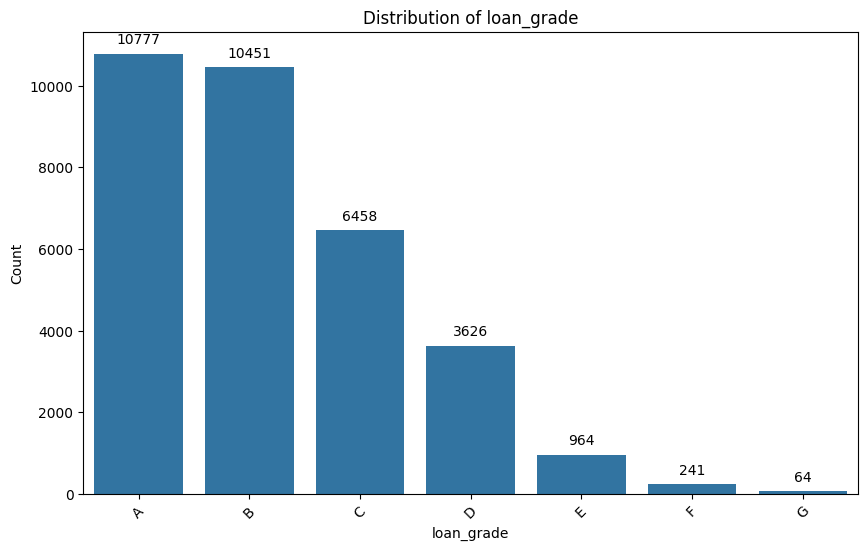

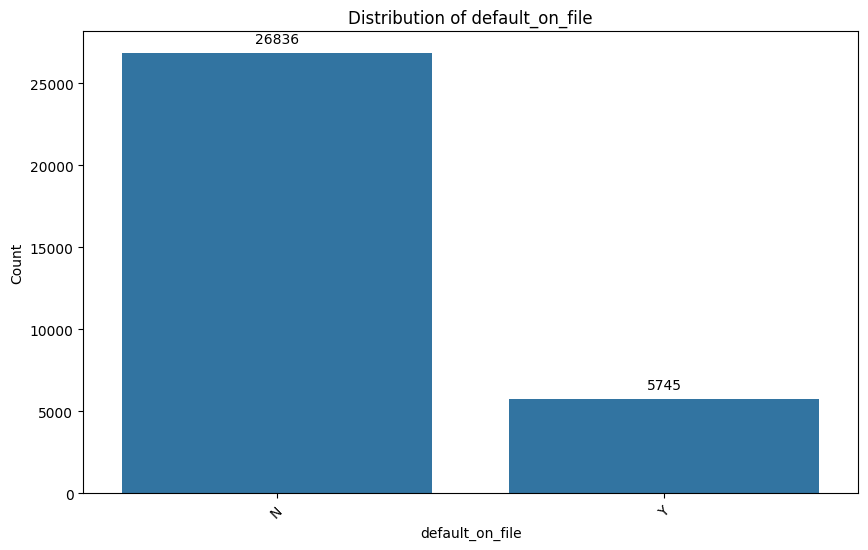

In [18]:
for column in cat_cols:
  plot_data_distribution(df, column)



*   Hầu hết người đi vay đều không có nhà riêng
*   Loan grade A & B chiếm 62.5% tổng
*   Loan intent được phân bố đều
*   Đa số khách hàng không có lịch sử vỡ nợ trên hồ sơ cá nhân






# NUMERICAL COLUMNS

In [19]:
df.select_dtypes(["int64","float"]).columns

Index(['age', 'annual_income', 'empl_length', 'loan_amnt', 'loan_int_rate',
       'target', 'loan_percent_income', 'credit_history_length'],
      dtype='object')

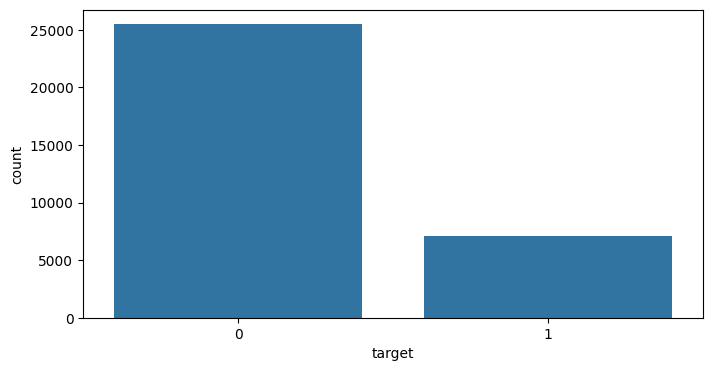

In [20]:
#check imbalance
plt.figure(figsize=(8,4))
sns.countplot(x='target', data=df)
plt.show()

Imbalance --> sử dụng oversampling (KNN-SMOTE)

# DATA PREPROCESSING


1. Removing Outliers

In [21]:
df.shape

(32581, 12)

In [22]:
df = df.loc[df['age']<80, :]

In [23]:
df = df.loc[df['empl_length']<60, :]

In [24]:
df.shape

(31676, 12)



2.  Handle missing values



In [25]:
loan_int_rate_median = df['loan_int_rate'].median()
df['loan_int_rate'].fillna(loan_int_rate_median, inplace=True)

In [26]:
empl_length_median = df['empl_length'].median()
df['empl_length'].fillna(empl_length_median, inplace=True)

In [27]:
missing_values = df.isnull().sum()
print("Số lượng giá trị thiếu trên mỗi cột:")
print(missing_values)

Số lượng giá trị thiếu trên mỗi cột:
age                      0
annual_income            0
home_ownership           0
empl_length              0
loan_intent              0
loan_grade               0
loan_amnt                0
loan_int_rate            0
target                   0
loan_percent_income      0
default_on_file          0
credit_history_length    0
dtype: int64


3. FEATURE ENGINERING

In [28]:
cat_cols = ['home_ownership', 'loan_intent', 'default_on_file']
for col in cat_cols:
    df[col] = df[col].astype(str)

df = pd.get_dummies(df)

In [29]:
# df.head()

In [30]:
# Create loan-to-income ratio
df['loan_to_income_ratio'] = df['loan_amnt'] / df['annual_income']

# Create loan-to-employment length ratio
df['loan_to_emp_length_ratio'] =  df['empl_length']/ df['loan_amnt']

# Create interest rate-to-loan amount ratio
df['int_rate_to_loan_amt_ratio'] = df['loan_int_rate'] / df['loan_amnt']

# SPLIT TRAIN, TEST

In [31]:
from sklearn.model_selection import train_test_split
X = df.drop(['target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# WOE & IV

In [32]:
def iv_woe(data, target, bins=10, show_woe=False):

    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()

    #Extract Column Names
    cols = data.columns

    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})


        # Calculate the number of events in each group (bin)
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']

        # Calculate % of events in each group.
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()

        # Calculate the non events in each group.
        d['Non-Events'] = d['N'] - d['Events']
        # Calculate % of non events in each group.
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()

        # Calculate WOE by taking natural log of division of % of non-events and % of events
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [33]:
df1 = pd.concat([X_train,y_train],axis=1)
iv_woe(df1, 'target', bins=10, show_woe=False)

Information value of age is 0.011422
Information value of annual_income is 0.458351
Information value of empl_length is 0.066925
Information value of loan_amnt is 0.094354
Information value of loan_int_rate is 0.693564
Information value of loan_percent_income is 0.881044
Information value of credit_history_length is 0.004989
Information value of home_ownership_MORTGAGE is 0.225074
Information value of home_ownership_OTHER is 0.000489
Information value of home_ownership_OWN is 0.096653
Information value of home_ownership_RENT is 0.359046
Information value of loan_intent_DEBTCONSOLIDATION is 0.026075
Information value of loan_intent_EDUCATION is 0.018253
Information value of loan_intent_HOMEIMPROVEMENT is 0.005627
Information value of loan_intent_MEDICAL is 0.020155
Information value of loan_intent_PERSONAL is 0.002486
Information value of loan_intent_VENTURE is 0.040276
Information value of loan_grade_A is 0.305885
Information value of loan_grade_B is 0.059186
Information value of loan_

(                        Variable        IV
 0                            age  0.011422
 0                  annual_income  0.458351
 0                    empl_length  0.066925
 0                      loan_amnt  0.094354
 0                  loan_int_rate  0.693564
 0            loan_percent_income  0.881044
 0          credit_history_length  0.004989
 0        home_ownership_MORTGAGE  0.225074
 0           home_ownership_OTHER  0.000489
 0             home_ownership_OWN  0.096653
 0            home_ownership_RENT  0.359046
 0  loan_intent_DEBTCONSOLIDATION  0.026075
 0          loan_intent_EDUCATION  0.018253
 0    loan_intent_HOMEIMPROVEMENT  0.005627
 0            loan_intent_MEDICAL  0.020155
 0           loan_intent_PERSONAL  0.002486
 0            loan_intent_VENTURE  0.040276
 0                   loan_grade_A  0.305885
 0                   loan_grade_B  0.059186
 0                   loan_grade_C  0.000831
 0                   loan_grade_D  0.486030
 0                   loan_grade_

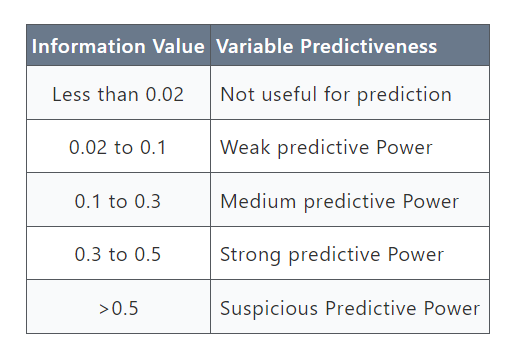

In [34]:
iv_values = {
    "age": 0.011422,
    "annual_income": 0.458351,
    "home_ownership": 0.385031,
    "empl_length": 0.066925,
    "loan_intent": 0.093669,
    "loan_grade": 0.928253,
    "loan_amnt": 0.094354,
    "loan_int_rate": 0.693564,
    "loan_percent_income": 0.881044,
    "default_on_file": 0.174384,
    "credit_history_length": 0.004989,
    "loan_to_income_ratio": 0.924024,
    "loan_to_emp_length_ratio": 0.122540,
    "int_rate_to_loan_amt_ratio": 0.027559,
}

iv_df = pd.DataFrame(list(iv_values.items()), columns=["Variable", "IV"])

# Define the classification rules
def classify_iv(iv):
    if iv < 0.02:
        return "Not useful for prediction"
    elif 0.02 <= iv < 0.1:
        return "Weak predictor"
    elif 0.1 <= iv < 0.3:
        return "Medium predictor"
    elif 0.3 <= iv < 0.5:
        return "Strong predictor"
    else:
        return "Suspiciously strong"

iv_df['Classification'] = iv_df['IV'].apply(classify_iv)

iv_df = iv_df.sort_values(by="IV").reset_index(drop=True)
iv_df

,Variable,IV,Classification
0,credit_history_length,0.004989,Not useful for prediction
1,age,0.011422,Not useful for prediction
2,int_rate_to_loan_amt_ratio,0.027559,Weak predictor
3,empl_length,0.066925,Weak predictor
4,loan_intent,0.093669,Weak predictor
5,loan_amnt,0.094354,Weak predictor
6,loan_to_emp_length_ratio,0.122540,Medium predictor
7,default_on_file,0.174384,Medium predictor
8,home_ownership,0.385031,Strong predictor
9,annual_income,0.458351,Strong predictor




*   biến loan_grade, loan_int_rate,loan_to_income_ratio và loan_percent_income có IV cao -->  chúng có khả năng dự đoán mạnh mẽ đối với biến mục tiêu target
*   age và credit_history_length có IV rất thấp, --> chúng có ít hoặc không có khả năng dự đoán.

In [35]:
!pip install scorecardpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 933.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.7-py3-none-any.whl size=60634 sha256=ff24ad4427d5c62fbac4c66be54fd4f196a5cf4265065fe23c1ec3482fea3462
  Stored in directory: /root/.cache/pip/wheels/49/49/e9/7b845548eed3624ce37effdd13e9cb95a99272d692eb9e9e23
Successfully built scorecardpy


[INFO] creating woe binning ...
Binning on 31676 rows and 30 columns in 00:00:15


{'loan_intent_DEBTCONSOLIDATION': <Figure size 640x480 with 2 Axes>,
 'loan_intent_EDUCATION': <Figure size 640x480 with 2 Axes>,
 'loan_intent_VENTURE': <Figure size 640x480 with 2 Axes>,
 'loan_intent_PERSONAL': <Figure size 640x480 with 2 Axes>,
 'loan_intent_HOMEIMPROVEMENT': <Figure size 640x480 with 2 Axes>,
 'default_on_file_N': <Figure size 640x480 with 2 Axes>,
 'loan_to_emp_length_ratio': <Figure size 640x480 with 2 Axes>,
 'loan_grade_D': <Figure size 640x480 with 2 Axes>,
 'home_ownership_RENT': <Figure size 640x480 with 2 Axes>,
 'loan_intent_MEDICAL': <Figure size 640x480 with 2 Axes>,
 'loan_grade_A': <Figure size 640x480 with 2 Axes>,
 'loan_int_rate': <Figure size 640x480 with 2 Axes>,
 'loan_grade_F': <Figure size 640x480 with 2 Axes>,
 'loan_grade_G': <Figure size 640x480 with 2 Axes>,
 'default_on_file_Y': <Figure size 640x480 with 2 Axes>,
 'loan_to_income_ratio': <Figure size 640x480 with 2 Axes>,
 'home_ownership_OWN': <Figure size 640x480 with 2 Axes>,
 'age': <

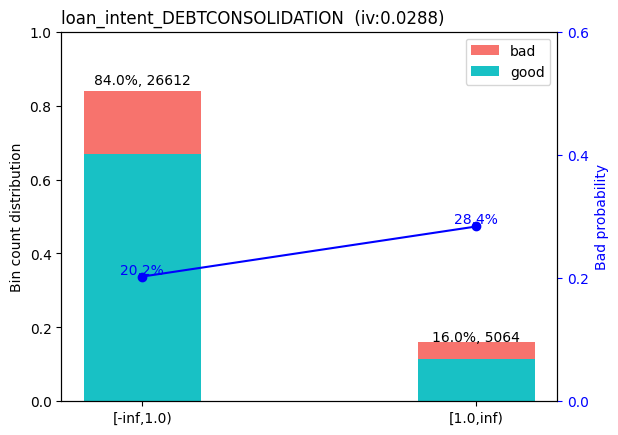

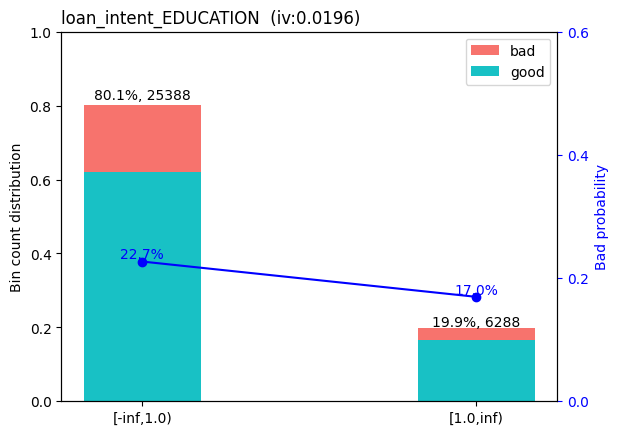

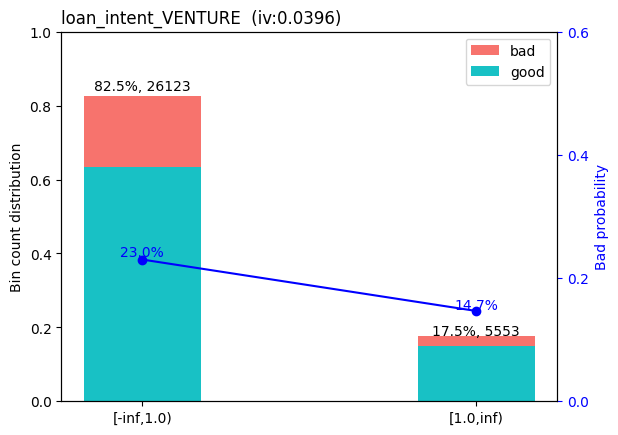

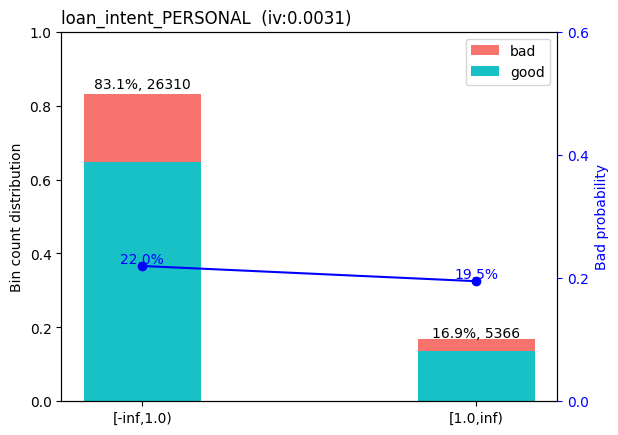

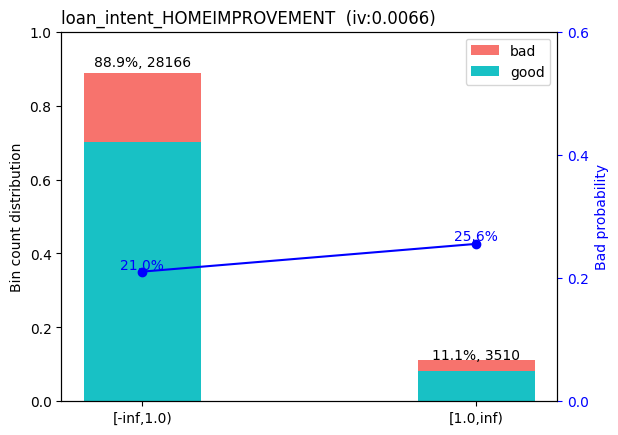

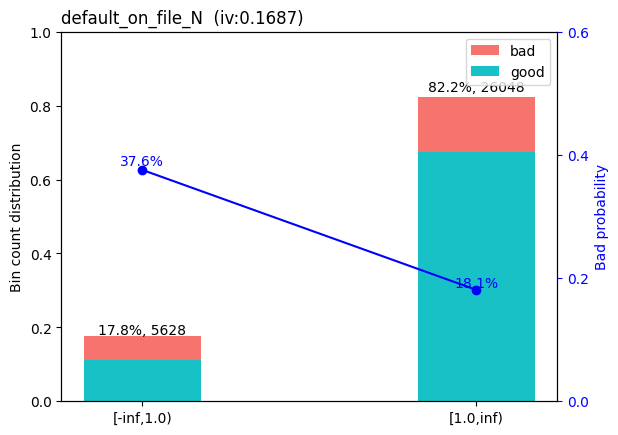

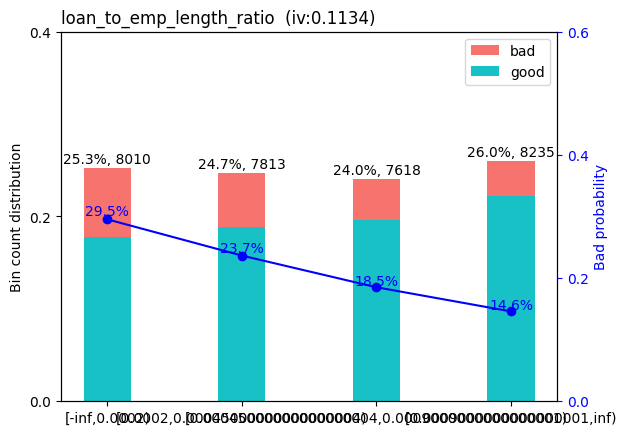

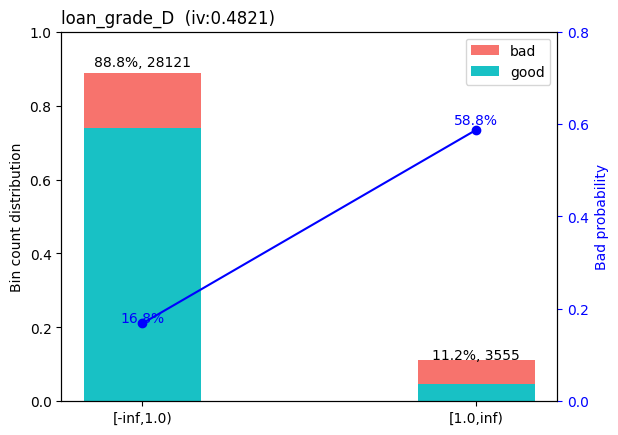

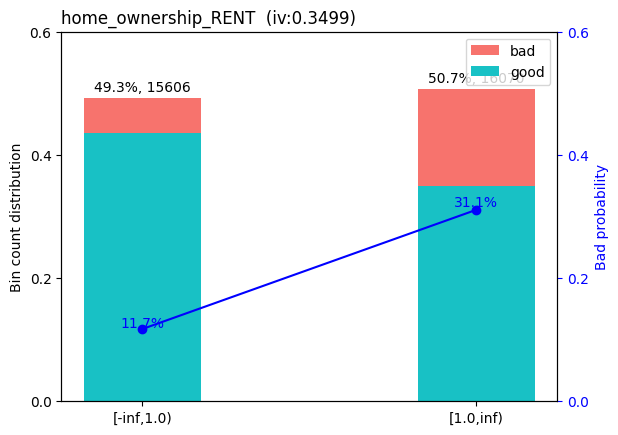

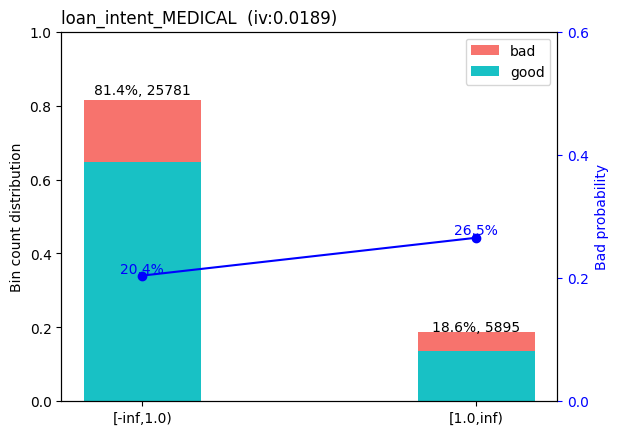

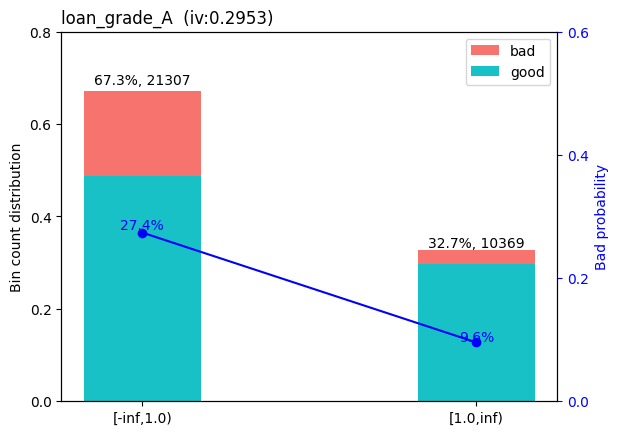

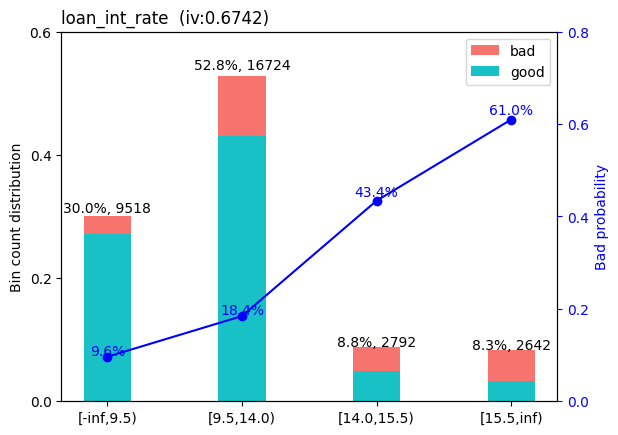

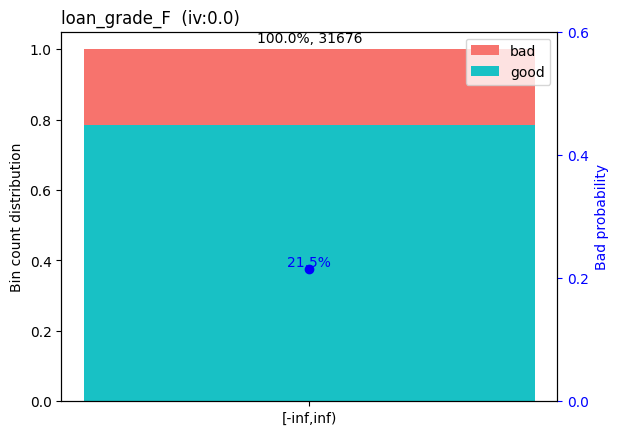

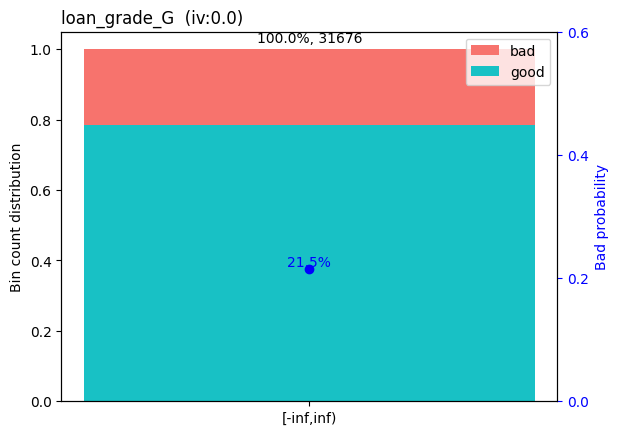

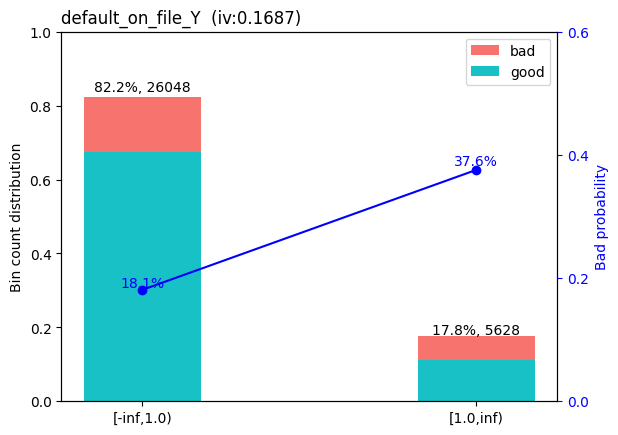

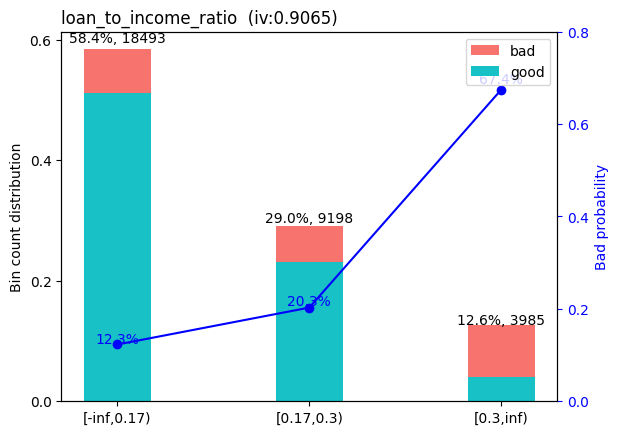

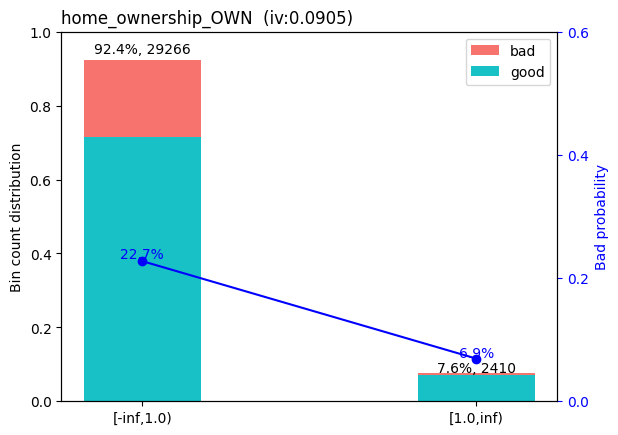

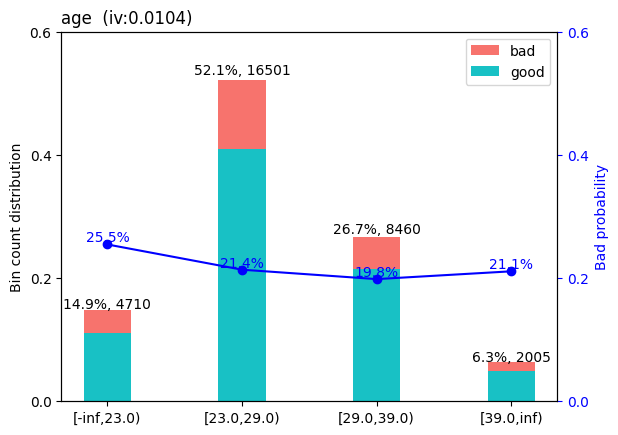

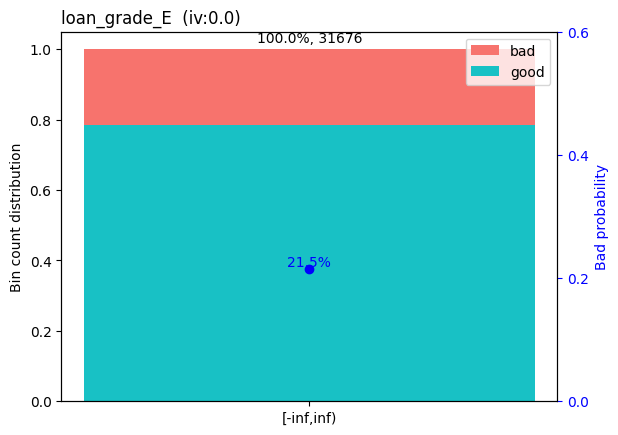

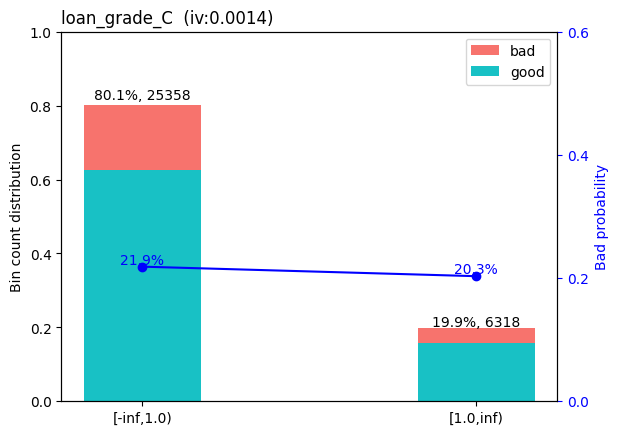

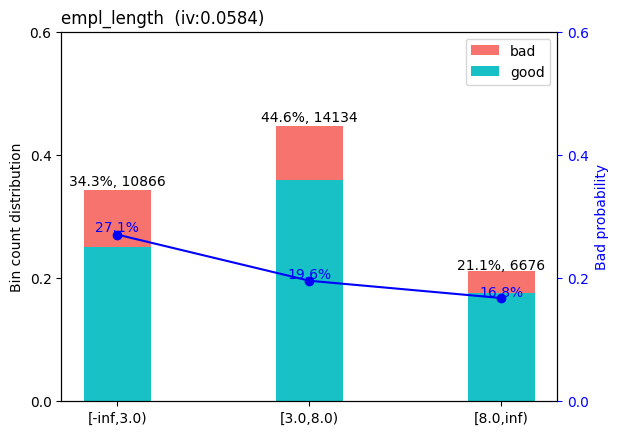

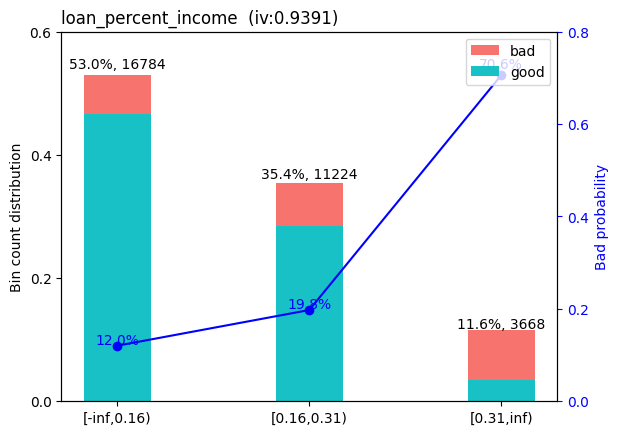

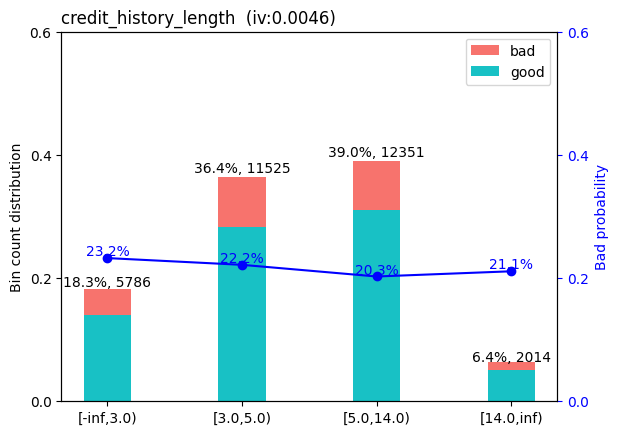

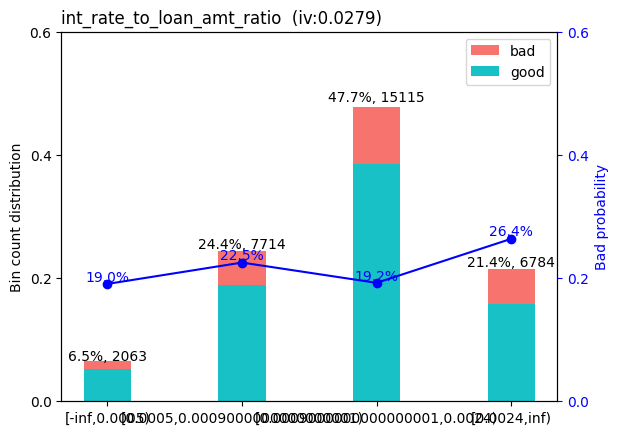

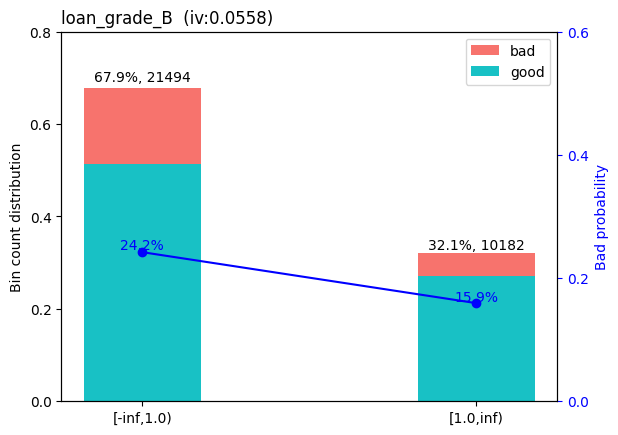

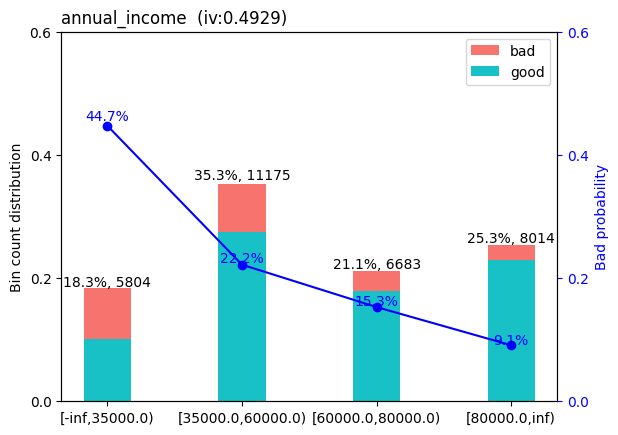

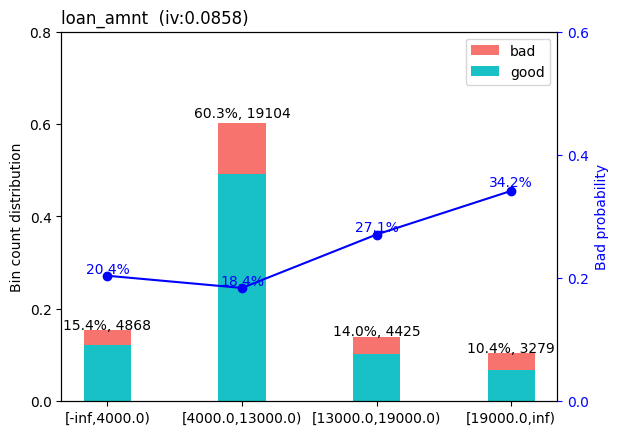

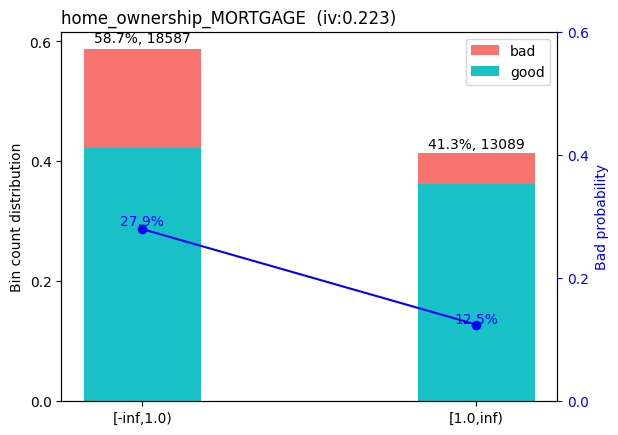

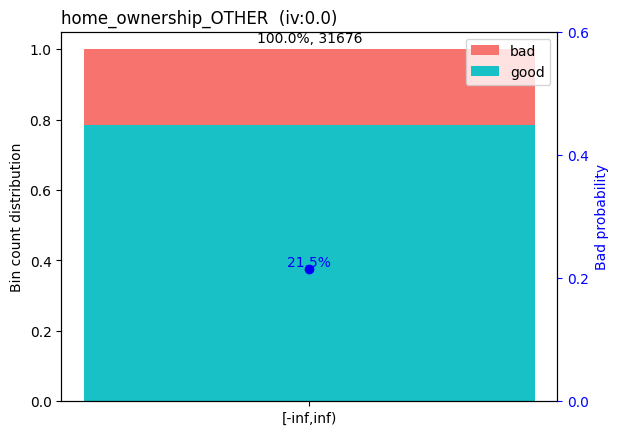

In [40]:
# woe binning ------
bins = sc.woebin(df, y="target")
sc.woebin_plot(bins)

In [36]:
import scorecardpy as sc

In [37]:
bins = sc.woebin(df, y="target")

[INFO] creating woe binning ...
Binning on 31676 rows and 30 columns in 00:00:27


In [38]:
train_woe = sc.woebin_ply(df, bins)

[INFO] converting into woe values ...


In [ ]:
train_woe.head()

,target,home_ownership_MORTGAGE_woe,credit_history_length_woe,loan_grade_C_woe,loan_intent_MEDICAL_woe,loan_intent_VENTURE_woe,loan_grade_G_woe,home_ownership_OWN_woe,default_on_file_Y_woe,loan_percent_income_woe,...,default_on_file_N_woe,loan_to_emp_length_ratio_woe,age_woe,empl_length_woe,loan_intent_HOMEIMPROVEMENT_woe,annual_income_woe,loan_grade_A_woe,loan_intent_EDUCATION_woe,loan_grade_E_woe,int_rate_to_loan_amt_ratio_woe
1,0,0.345345,0.097820,0.018171,-0.069012,0.084580,0.0,-1.305270,-0.218237,-0.696789,...,-0.218237,-0.475295,0.217893,-0.121095,-0.02981,1.080630,0.316912,-0.296661,0.0,0.265525
2,1,-0.657890,0.035466,-0.074907,0.274624,0.084580,0.0,0.069821,-0.218237,2.166230,...,-0.218237,0.422913,-0.010915,0.300567,-0.02981,1.080630,0.316912,0.066061,0.0,-0.143090
3,1,0.345345,0.097820,-0.074907,0.274624,0.084580,0.0,0.069821,-0.218237,2.166230,...,-0.218237,0.422913,-0.010915,-0.121095,-0.02981,-0.419533,0.316912,0.066061,0.0,-0.154464
4,1,0.345345,0.035466,-0.074907,0.274624,0.084580,0.0,0.069821,0.784133,2.166230,...,0.784133,0.120501,-0.010915,-0.310317,-0.02981,0.036779,0.316912,0.066061,0.0,-0.154464
5,1,0.345345,0.097820,0.018171,-0.069012,-0.469315,0.0,-1.305270,-0.218237,-0.109541,...,-0.218237,-0.189943,0.217893,0.300567,-0.02981,1.080630,-0.955102,0.066061,0.0,0.265525


In [ ]:
X_woe = train_woe.drop(['target'], axis=1)
y_woe = train_woe['target']

X_train_woe, X_test_woe, y_train_woe, y_test_woe = train_test_split(X_woe, y_woe, test_size=0.3, stratify=y_woe, random_state=42)

print("X=",X_train_woe.shape, X_test_woe.shape)
print("y=",y_train_woe.shape, y_test_woe.shape)

X= (22173, 29) (9503, 29)
y= (22173,) (9503,)


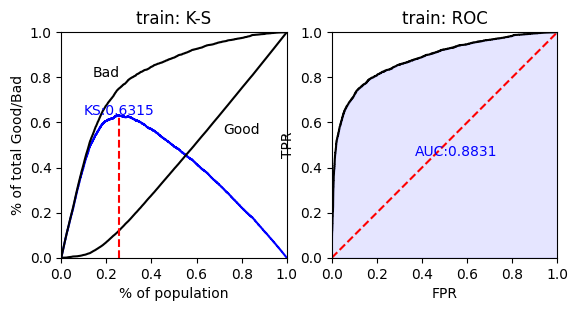

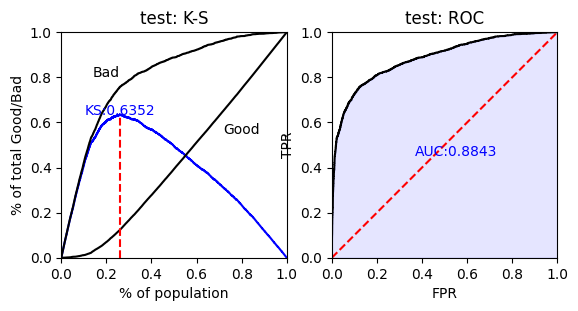

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(X_train_woe, y_train_woe)
# lr.coef_
# lr.intercept_

# predicted proability
train_pred = lr.predict_proba(X_train_woe)[:,1]
test_pred = lr.predict_proba(X_test_woe)[:,1]

# performance ks & roc ------
train_perf = sc.perf_eva(y_train_woe, train_pred, title = "train")
test_perf = sc.perf_eva(y_test_woe, test_pred, title = "test")
